In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from collections import Counter
import xgboost as xgb

In [2]:
df = pd.read_csv('finalDatasetWithRain.csv')

In [3]:
df

,lat,lon,time,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,...,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
0,30.0000,70.00,1948-01-01,0.043999,-0.005003,-0.050001,9.959991,22.25,42.50,47.500015,...,296.8,281.41998,296.07000,16.120010,4.600006,-1.879990,-1.209992,-0.589996,-1.989990,-9999.0
1,30.0000,70.00,1948-01-02,0.094997,0.104998,0.006998,9.519989,19.50,32.75,51.250015,...,296.8,282.12000,295.99000,18.000015,3.570007,-3.589996,-5.759995,-4.379990,-4.009995,-9999.0
2,30.0000,70.00,1948-01-03,0.038998,0.036999,0.013998,10.220001,25.50,25.50,52.750015,...,296.8,282.25000,295.91998,13.820007,3.570007,-2.759994,-3.939987,-1.909988,-1.259994,-9999.0
3,30.0000,70.00,1948-01-04,0.264997,0.215998,0.077997,9.470001,11.25,15.75,50.500015,...,296.8,282.20000,295.87000,14.750015,5.000015,-1.089996,-16.789993,-7.789993,-5.259995,-9999.0
4,30.0000,70.00,1948-01-05,0.100998,0.128998,0.016998,11.269989,39.75,33.25,47.000015,...,296.8,282.34998,295.80000,27.470001,9.320007,-3.309998,-12.139984,-6.079987,-3.259994,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622387,23.8092,78.75,2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,295.2,287.34998,294.60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622388,23.8092,78.75,2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,295.2,284.17500,294.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622389,23.8092,78.75,2018-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,295.2,282.42500,294.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622390,23.8092,78.75,2018-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,295.2,282.82500,294.40000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,lat,lon,time,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,...,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
0,30.0,70.0,1948-01-01,0.043999,-0.005003,-0.050001,9.959991,22.25,42.50,47.500015,...,296.8,281.41998,296.07000,16.120010,4.600006,-1.879990,-1.209992,-0.589996,-1.989990,-9999.0
1,30.0,70.0,1948-01-02,0.094997,0.104998,0.006998,9.519989,19.50,32.75,51.250015,...,296.8,282.12000,295.99000,18.000015,3.570007,-3.589996,-5.759995,-4.379990,-4.009995,-9999.0
2,30.0,70.0,1948-01-03,0.038998,0.036999,0.013998,10.220001,25.50,25.50,52.750015,...,296.8,282.25000,295.91998,13.820007,3.570007,-2.759994,-3.939987,-1.909988,-1.259994,-9999.0
3,30.0,70.0,1948-01-04,0.264997,0.215998,0.077997,9.470001,11.25,15.75,50.500015,...,296.8,282.20000,295.87000,14.750015,5.000015,-1.089996,-16.789993,-7.789993,-5.259995,-9999.0
4,30.0,70.0,1948-01-05,0.100998,0.128998,0.016998,11.269989,39.75,33.25,47.000015,...,296.8,282.34998,295.80000,27.470001,9.320007,-3.309998,-12.139984,-6.079987,-3.259994,-9999.0


In [5]:
df.tail()

,lat,lon,time,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,...,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
622387,23.8092,78.75,2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,295.2,287.34998,294.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622388,23.8092,78.75,2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,295.2,284.17500,294.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622389,23.8092,78.75,2018-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,295.2,282.42500,294.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622390,23.8092,78.75,2018-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,295.2,282.82500,294.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622391,23.8092,78.75,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,295.2,283.17500,294.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Droping na values

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(310836, 21)

In [8]:
df = df.drop('rain', axis=1)

In [9]:
df_copy = df.copy()

In [10]:
df_copy

,lat,lon,time,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
0,30.0,70.0,1948-01-01,0.043999,-0.005003,-0.050001,9.959991,22.25,42.50,47.500015,101910.0,296.8,281.41998,296.07000,16.120010,4.600006,-1.879990,-1.209992,-0.589996,-1.989990
1,30.0,70.0,1948-01-02,0.094997,0.104998,0.006998,9.519989,19.50,32.75,51.250015,102190.0,296.8,282.12000,295.99000,18.000015,3.570007,-3.589996,-5.759995,-4.379990,-4.009995
2,30.0,70.0,1948-01-03,0.038998,0.036999,0.013998,10.220001,25.50,25.50,52.750015,102222.0,296.8,282.25000,295.91998,13.820007,3.570007,-2.759994,-3.939987,-1.909988,-1.259994
3,30.0,70.0,1948-01-04,0.264997,0.215998,0.077997,9.470001,11.25,15.75,50.500015,102042.0,296.8,282.20000,295.87000,14.750015,5.000015,-1.089996,-16.789993,-7.789993,-5.259995
4,30.0,70.0,1948-01-05,0.100998,0.128998,0.016998,11.269989,39.75,33.25,47.000015,102215.0,296.8,282.34998,295.80000,27.470001,9.320007,-3.309998,-12.139984,-6.079987,-3.259994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310831,25.0,77.5,2018-11-27,0.074250,0.022500,0.069750,12.425000,28.50,5.75,39.000000,101535.0,295.9,291.82500,296.70000,12.975000,1.125001,-3.899998,1.900000,-0.899999,-0.699999
310832,25.0,77.5,2018-11-28,-0.055500,-0.001500,0.033750,16.825000,60.50,8.25,54.250000,101640.0,295.9,292.12500,296.70000,18.400002,3.850000,-2.249999,7.375000,-0.425000,-0.224998
310833,25.0,77.5,2018-11-29,0.181500,0.118250,0.092750,17.575000,12.75,16.25,60.250000,101725.0,295.9,292.42500,296.67502,20.525002,5.350001,-1.225000,-2.800000,-2.950000,-2.574999
310834,25.0,77.5,2018-11-30,0.073500,0.090250,0.098000,15.424999,14.50,12.00,49.000000,101642.5,295.9,292.00000,296.60000,24.275003,10.950001,-0.474999,-1.750000,-5.150000,-3.199999


In [11]:
df_copy = df_copy.drop('time', axis=1)

In [12]:
df_copy

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
0,30.0,70.0,0.043999,-0.005003,-0.050001,9.959991,22.25,42.50,47.500015,101910.0,296.8,281.41998,296.07000,16.120010,4.600006,-1.879990,-1.209992,-0.589996,-1.989990
1,30.0,70.0,0.094997,0.104998,0.006998,9.519989,19.50,32.75,51.250015,102190.0,296.8,282.12000,295.99000,18.000015,3.570007,-3.589996,-5.759995,-4.379990,-4.009995
2,30.0,70.0,0.038998,0.036999,0.013998,10.220001,25.50,25.50,52.750015,102222.0,296.8,282.25000,295.91998,13.820007,3.570007,-2.759994,-3.939987,-1.909988,-1.259994
3,30.0,70.0,0.264997,0.215998,0.077997,9.470001,11.25,15.75,50.500015,102042.0,296.8,282.20000,295.87000,14.750015,5.000015,-1.089996,-16.789993,-7.789993,-5.259995
4,30.0,70.0,0.100998,0.128998,0.016998,11.269989,39.75,33.25,47.000015,102215.0,296.8,282.34998,295.80000,27.470001,9.320007,-3.309998,-12.139984,-6.079987,-3.259994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310831,25.0,77.5,0.074250,0.022500,0.069750,12.425000,28.50,5.75,39.000000,101535.0,295.9,291.82500,296.70000,12.975000,1.125001,-3.899998,1.900000,-0.899999,-0.699999
310832,25.0,77.5,-0.055500,-0.001500,0.033750,16.825000,60.50,8.25,54.250000,101640.0,295.9,292.12500,296.70000,18.400002,3.850000,-2.249999,7.375000,-0.425000,-0.224998
310833,25.0,77.5,0.181500,0.118250,0.092750,17.575000,12.75,16.25,60.250000,101725.0,295.9,292.42500,296.67502,20.525002,5.350001,-1.225000,-2.800000,-2.950000,-2.574999
310834,25.0,77.5,0.073500,0.090250,0.098000,15.424999,14.50,12.00,49.000000,101642.5,295.9,292.00000,296.60000,24.275003,10.950001,-0.474999,-1.750000,-5.150000,-3.199999


## Heatmap Visualization

<AxesSubplot:>

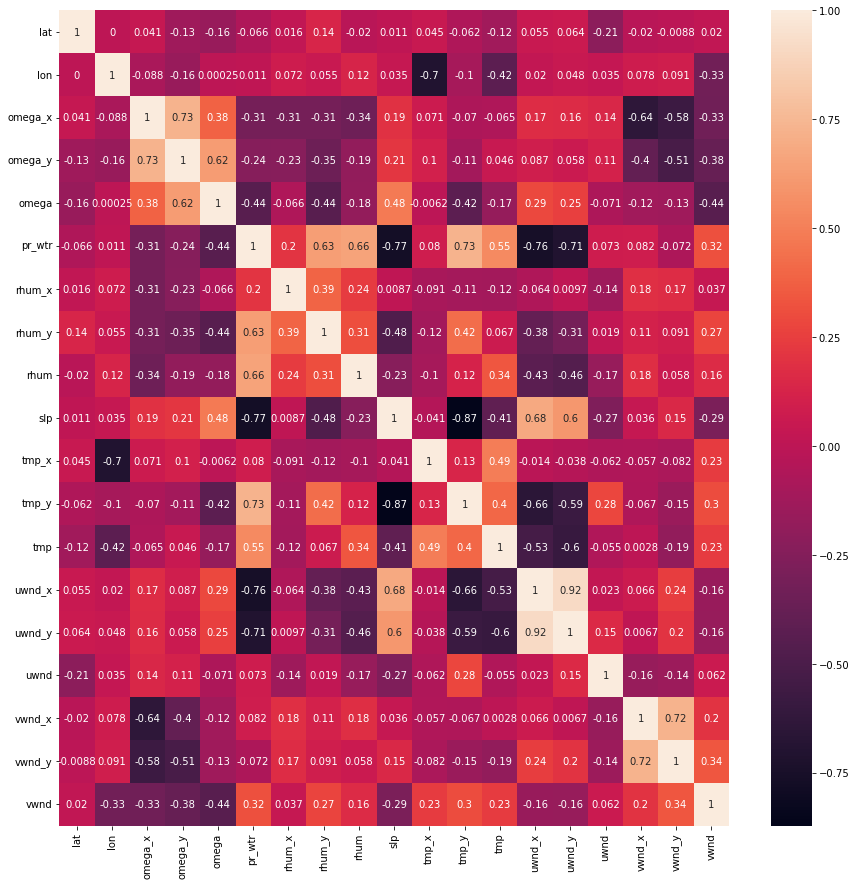

In [13]:
Heat_map = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
sns.heatmap(Heat_map,annot=True)

# Feature Exploration

In [14]:
numerical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df_copy[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df_copy.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 19
Discrete feature Count 3
Continuous feature Count 16
Categorical feature Count 0


C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


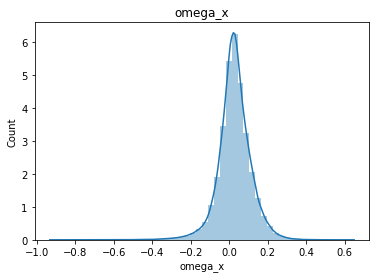

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


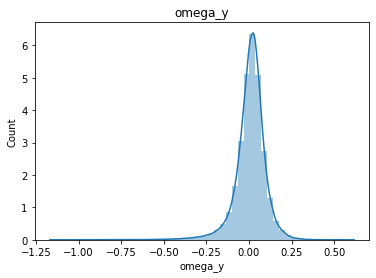

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


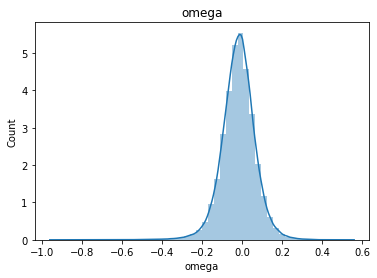

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


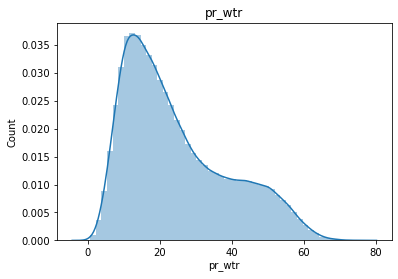

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


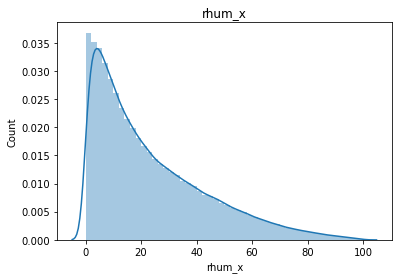

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


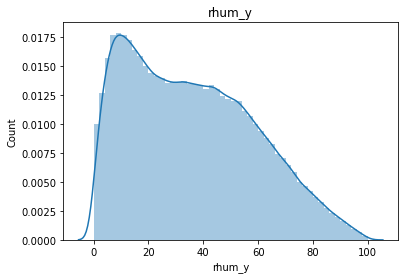

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


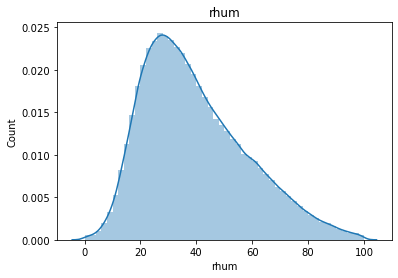

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


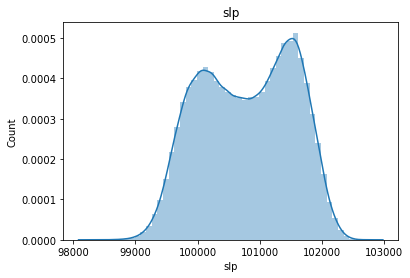

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


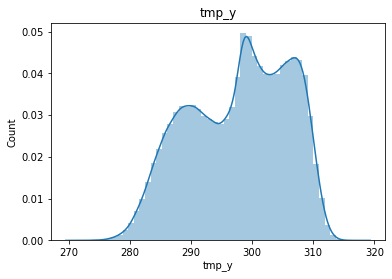

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


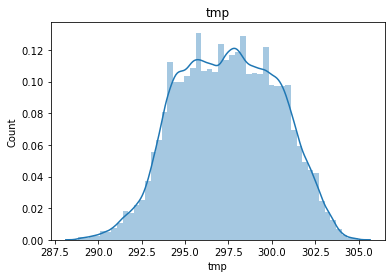

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


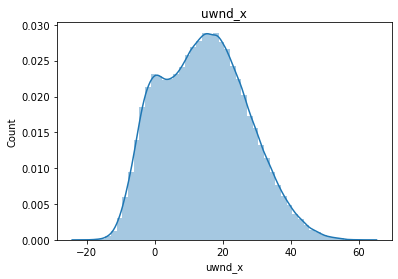

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


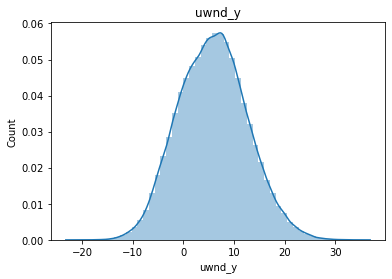

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


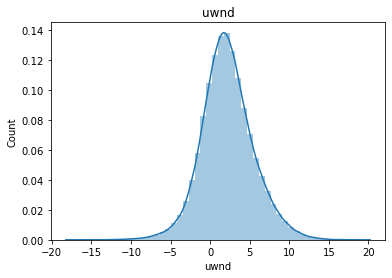

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


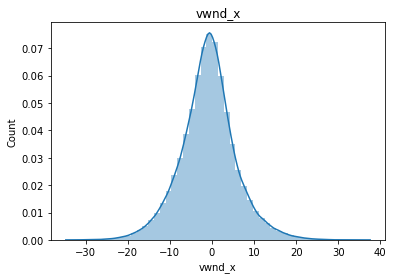

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


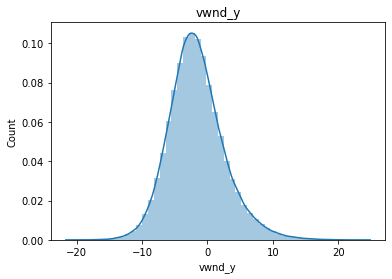

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRINCESS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


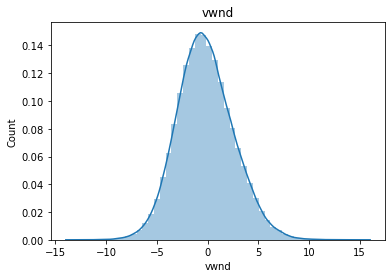

<Figure size 1080x1080 with 0 Axes>

In [15]:
for feature in continuous_feature:
    df_copy
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [16]:
Y = df_copy['pr_wtr']
X = df_copy.drop('pr_wtr', axis = 1)

In [17]:
Y

0          9.959991
1          9.519989
2         10.220001
3          9.470001
4         11.269989
            ...    
310831    12.425000
310832    16.825000
310833    17.575000
310834    15.424999
310835    10.700000
Name: pr_wtr, Length: 310836, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.3, random_state = 1)


In [19]:
#from sklearn.feature_selection import mutual_info_classif
#mutual_info = mutual_info_classif(X_train, y_train)
#mutual_info

In [20]:
reg = xgb.XGBRegressor(n_estimators=1000, learning_rate = 0.001)
reg.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], early_stopping_rounds = 50, verbose=100)
#model = XGBRFRegressor(objective ="reg:squarederror", n_estimators=1000)

C:\Users\PRINCESS\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:28.12849	validation_1-rmse:28.12222
[100]	validation_0-rmse:25.51834	validation_1-rmse:25.51089
[200]	validation_0-rmse:23.16017	validation_1-rmse:23.15184
[300]	validation_0-rmse:21.02954	validation_1-rmse:21.02023
[400]	validation_0-rmse:19.10424	validation_1-rmse:19.09489
[500]	validation_0-rmse:17.36417	validation_1-rmse:17.35525
[600]	validation_0-rmse:15.79281	validation_1-rmse:15.78388
[700]	validation_0-rmse:14.37304	validation_1-rmse:14.36446
[800]	validation_0-rmse:13.09170	validation_1-rmse:13.08391
[900]	validation_0-rmse:11.93549	validation_1-rmse:11.92872
[999]	validation_0-rmse:10.90263	validation_1-rmse:10.89660


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

## feature importance

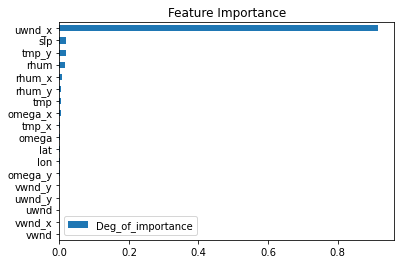

In [21]:
feature_import=pd.DataFrame(data=reg.feature_importances_, index = reg.feature_names_in_,
            columns=['Deg_of_importance'])
feature_import.sort_values('Deg_of_importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Forecast on Test

In [22]:
predictions =reg.predict(X_test)

In [23]:
print(predictions)

[24.190714  10.994669  21.684832  ...  6.1992254  6.92543    4.5309834]
